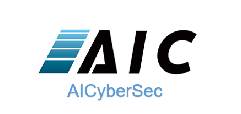

# Webscraping with Selenium

---


## Enter Selenium

---

Selenium is a headless browser. That means it enables us to mock human browsing behavior -- even waiting for JavaScript elements to load.

If you do not already have Selenium installed, you can do so via pip. Simply: `pip install selenium`

In [2]:
# import package
from selenium import webdriver

Selenium requires us to determine a default browser to run. I'm going to opt for Firefox, but Chromium is also a very common choice. http://selenium-python.readthedocs.io/faq.html

### 1. What is going to happen when I run the next cell?

The chromedriver has been provided in the 'chromedriver' folder so no reason to download another.

In [ ]:
# create a driver called driver
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver")

Pretty crazy, right? Let's close that driver.

In case you're wondering. this should have opened up a new browswer window.  Check all of your desktop displays if you didn't see it automatically pop up.

In [4]:
# close it
driver.close()

### 2. Use the driver to visit `www.python.org`

In [5]:
# A:
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver")
driver.get("http://www.python.org")

In [6]:
driver.close()

### 3. Visit the OpenTable page using the driver

Let's return to our problem at hand. We need to visit the OpenTable listing for DC. Once there, we need to get the html to load. 

In the next cell, prove you can programmatically visit the page.

In [7]:
# A:
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver")
driver.get("http://www.opentable.com/washington-dc-restaurant-listings")

In [8]:
driver.close()

### 4. Resolve the javascript issue using the driver and find the bookings.

What we can do in this case is:
1. Request that the page load
2. wait one second
3. grab the source html from the page 

Because the page should believe I'm visiting from a live connection on a browser client, the JavaScript should render to be a part of the page source. I can then grab the page source.

**Once you have the HTML with the javascript rendered, repeat the processes above to find the bookings.**

In [9]:
# import sleep
from time import sleep

In [10]:
# A:
# visit our relevant page
driver = webdriver.Chrome(executable_path='./chromedriver/chromedriver')
driver.get("http://www.opentable.com/washington-dc-restaurant-listings")

# wait one second
sleep(1)

#grab the page source
html = driver.page_source

In [11]:
# print the source to see that it exisits
html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head><meta charset="utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=9; IE=8; IE=7; IE=EDGE" /> <title>Washington, D.C. Area Restaurants List | OpenTable</title>  <meta name="description" content="Find Washington, D.C. Area restaurants. Search by location, cuisine, or price to refine restaurant results in the Washington, D.C. Area area." />   <meta name="robots" content="noindex" /> <link rel="canonical" href="https://www.opentable.com/washington-dc-restaurant-listings" />       <link rel="shortcut icon" href="//components.otstatic.com/components/favicon/1.0.5/favicon/favicon.ico" type="image/x-icon" /><link rel="icon" href="//components.otstatic.com/components/favicon/1.0.5/favicon/favicon-16.png" sizes="16x16" /><link rel="icon" href="//components.otstatic.com/components/favicon/1.0.5/favicon/favicon-32.png" sizes="32x32" /><link rel="icon" href="//components.otstatic.com/components/favicon/1.0.5/favicon/fav

In [12]:
# close the driver
driver.close()

### 5. Can we get all of the items we want from the page in a single `find_all`?

To be most efficient, we want to only do a single loop for each entry on the page. That means we want to find what element all of other other elements (name, location, price, bookings) is housed within. Where on the page is each entry located?

In [4]:
# A:
# import our necessary first packages
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
# assign parsed html versio to a BeautifulSoup object
html = BeautifulSoup(html, 'lxml')

In [15]:
# iterating through each span with the specified class to get the name of each restaurant
for name in html.findAll(name='span', attrs={'class': 'rest-row-name-text'}):
    print(name.text)
print()
# iterating through each span with the specified class to get the location of each restaurant
for location in html.findAll(name='span', attrs={'class': 'rest-row-meta--location rest-row-meta-text'}):
    print(location.text)
print()
# iterating through each span with the specified class to get the price of each restaurant
for price in html.find_all('div', {'class':'rest-row-pricing'}):
    print(price.find('i').text.count('$'))
print()
# for each entry, grab the text
for booking in html.find_all('div', {'class':'booking'}):
    # match all digits
    match = re.search('\d+', booking.text)
    
    if match:
        # print if found
        print(match.group())
    else:
        # otherwise pass
        pass

Ruffino's - Arlington
Joe's Place Pizza and Pasta
Founding Farmers - DC
Filomena Ristorante
Farmers Fishers Bakers
Ambar - Arlington
Rasika West End
Gyu-Kaku - Arlington
Blue Duck Tavern
BlackSalt
Tupelo Honey - Arlington
Il Canale
Bistro Aracosia
Ray's The Steaks
Green Pig Bistro
Et Voila
Nobu DC
1789 Restaurant
Lyon Hall
Chez Billy Sud
The Liberty Tavern
Bourbon Steak - Four Seasons Washington DC
Iron Gate
Café Milano
Sequoia
Boqueria - Dupont
Kapnos Taverna Arlington
CIRCA at Clarendon
Medium Rare - Arlington
CIRCA at Foggy Bottom
Clyde's of Georgetown
J. Gilbert’s – Wood Fired Steaks & Seafood - McLean
District Commons
SER
Pisco y Nazca Ceviche Gastrobar - Washington D.C.
The Melting Pot - Arlington VA
Cava Mezze - Clarendon
Millie's
BLT Steak DC
Tabard Inn
AGORA
El Centro D.F. - Georgetown
Texas Jacks Barbecue
Wilson Hardware Kitchen & Bar
The Palm Washington DC
Kingbird at The Watergate Hotel
Bombay Club
Roof Terrace Restaurant & Bar
The Capital Grille - Chevy Chase
Uncle Julio's

### 6. Does every single entry have each element we want?

In [16]:
# A:
# No some are missing some data

### 7. Use python exceptions to handle cases when bookings aren't found.

When a booking is not found, store `'ZERO'`.

In [17]:
# A:
# for each entry, grab the text
for entry in html.find_all('div', {'class':'result content-section-list-row cf with-times'}):
    booking_tag = entry.find('div', {'class':'booking'})
#     assign ZERO value if there is no value assigned to the specified restaurant
    bookings= 'ZERO'
    # get bookings
    if booking_tag:
#       search for a digit   
        match = re.search('\d+', booking_tag.text)
        if match:
            bookings = match.group()
    print(bookings)

ZERO
ZERO
459
118
254
94
101
59
87
57
162
118
36
64
57
39
58
54
59
61
62
57
57
51
39
61
58
38
68
74
120
98
76
23
61
31
23
28
54
87
62
86
44
28
68
48
44
49
55
10
26
35
40
28
42
27
19
25
18
16
79
38
59
33
9
17
63
8
24
70
50
86
53
25
21
42
100
28
14
14
34
10
59
42
15
48
21
21
33
21
32
18
12
7
21
27
27
16
10
6


### 8. Putting it all together in a dataframe.

**Loop through each entry. For each entry:**
1. Grab the relevant information we want (name, location, price, bookings). 
2. Produce a dataframe with the columns "name","location","price","bookings" that contains the 100 entries we would like.

In [18]:
import pandas as pd
# A:
# Put code here that populates the DataFrame using Selenium and BeautifulSoup!
# if we find the element we want, we print it. Otherwise, we print 'ZERO'
dc_eats = pd.DataFrame()
for entry in html.find_all('div', {'class':'result content-section-list-row cf with-times'}):
    booking_tag = entry.find('div', {'class':'booking'})
    bookings= 'ZERO'
    # get bookings
    if booking_tag:
        match = re.search('\d+', booking_tag.text)
        if match:
            bookings = match.group()
    # name
    name =  entry.find('span', {'class':'rest-row-name-text'}).text
    location =  entry.find('span', {'class':'rest-row-meta--location rest-row-meta-text'}).text
    price =  entry.find('div', {'class':'rest-row-pricing'}).find('i').text.count('$')
    
    result = {'price': price, 'location': location, 'name': name, 'bookings': bookings}
    dc_eats = dc_eats.append(result,  ignore_index=True)
#     l.append(result)
#     dc_eats = pd.DataFrame(l)
dc_eats

,bookings,location,name,price
0,ZERO,Arlington,Ruffino's - Arlington,2.0
1,ZERO,Arlington,Joe's Place Pizza and Pasta,2.0
2,459,Foggy Bottom,Founding Farmers - DC,2.0
3,118,Georgetown,Filomena Ristorante,3.0
4,254,Georgetown,Farmers Fishers Bakers,2.0
5,94,Arlington,Ambar - Arlington,2.0
6,101,West End,Rasika West End,3.0
7,59,Arlington,Gyu-Kaku - Arlington,2.0
8,87,West End,Blue Duck Tavern,3.0
9,57,Palisades Northwest,BlackSalt,3.0


### 9. [Bonus] Sending keys over the driver.

We can send keys to the page using the driver. Below is a demonstration of how to search the page using the Selenium driver.

In [19]:
# we can send keys as well
# from selenium.webdriver.common.keys import Keys

In [20]:
# # open the driver
# driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver")

# # visit Python
# driver.get("http://www.python.org")

# # verify we're in the right place
# assert "Python" in driver.title

In [21]:
# # find the search position
# elem = driver.find_element_by_name("q")
# # clear it
# elem.clear()
# # type in pycon
# elem.send_keys("pycon")


In [22]:
# # send those keys
# elem.send_keys(Keys.RETURN)

# # no results
# assert "No results found." not in driver.page_source

In [23]:
# driver.close()

In [24]:
# # all at once:
# driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver")
# driver.get("http://www.python.org")
# assert "Python" in driver.title
# elem = driver.find_element_by_name("q")
# elem.clear()
# elem.send_keys("pycon")
# elem.send_keys(Keys.RETURN)
# assert "No results found." not in driver.page_source
# driver.close()

## Additional resources

---

The above example (and many others) are available in the Selenium docs: http://selenium-python.readthedocs.io/getting-started.html

What is especially important is exploring functionality like locating elements: http://selenium-python.readthedocs.io/locating-elements.html#locating-elements

FAQ:
http://selenium-python.readthedocs.io/faq.html